In [192]:
import pandas as pd
import numpy as np
from numpy import int64
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2

In [271]:
# def convert_to_int()

def get_reshape(row):
    # print(row)
    return np.fromstring(row['grid'].replace('\n','')
                .replace('[','')
                .replace(']','')
                .replace('  ',' '), sep=' ').reshape(row['grid_rows'],row['grid_columns'])

def gen_heatmap(df,f, ax):
    df = df.reset_index()
    x_array = df['x'].to_numpy()
    y_array =df['y'].to_numpy()
    grid = np.zeros((df['grid_rows'][0],df['grid_columns'][0]))
    for i, j in zip(y_array,x_array):
        grid[i,j]+=1
    heat =sns.heatmap(grid,cmap='viridis',alpha =0.6,zorder=2,ax=ax)
    my_image = mpimg.imread(f)
    # plt.imshow(my_image)
    plt.title(df['experiment'][0])
    ax.heat.imshow(my_image,aspect=heat.get_aspect(),extent= heat.get_xlim() + heat.get_ylim(),zorder=1)
    # plt.close()
    # return heat


In [162]:

df1 = pd.read_csv('./data/data.csv')
df = pd.read_csv('./data/data_policy_switching.csv')
df.dtypes

experiment       object
level            object
run               int64
step              int64
x                 int64
y                 int64
grid             object
play_style       object
action           object
observation      object
done               bool
reward          float64
info             object
grid_rows         int64
grid_columns      int64
dtype: object

### Data Handling

In [163]:

df1['grid'] = df1[['grid','grid_rows','grid_columns']].apply(lambda x: get_reshape(x),axis=1)
df['grid'] = df[['grid','grid_rows','grid_columns']].apply(lambda x: get_reshape(x),axis=1)

In [164]:
df.head()

,experiment,level,run,step,x,y,grid,play_style,action,observation,done,reward,info,grid_rows,grid_columns
0,single_play-exit,policy_0,0,0,1,14,"[[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0,...",exit_safely_actions,EXIT_SAFELY,[10 8 8 6 6 27 27 30],False,-1.0,"{'EXIT_SAFELY': 1, '.': 1}",15,15
1,single_play-exit,policy_0,0,1,2,14,"[[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0,...",exit_safely_actions,EXIT_SAFELY,[ 9 7 7 5 5 26 26 30],False,-1.0,"{'EXIT_SAFELY': 2, '.': 2}",15,15
2,single_play-exit,policy_0,0,2,3,14,"[[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0,...",exit_safely_actions,EXIT_SAFELY,[ 8 6 6 4 4 25 25 30],False,-1.0,"{'EXIT_SAFELY': 3, '.': 3}",15,15
3,single_play-exit,policy_0,0,3,4,14,"[[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0,...",exit_safely_actions,EXIT_SAFELY,[ 7 5 5 3 3 24 24 30],False,-1.0,"{'EXIT_SAFELY': 4, '.': 4}",15,15
4,single_play-exit,policy_0,0,4,5,14,"[[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0,...",exit_safely_actions,EXIT_SAFELY,[ 6 4 4 2 2 23 23 30],False,-1.0,"{'EXIT_SAFELY': 5, '.': 5}",15,15


### Generate images

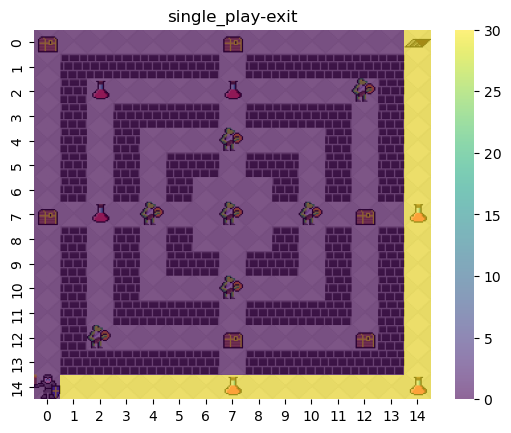

In [267]:
# for policy_0 level
gen_heatmap(df=df.loc[df['experiment'] == 'single_play-exit'], f ='./README/resources/md_stages_screenshots/md-policy_0-v0_step0.png')


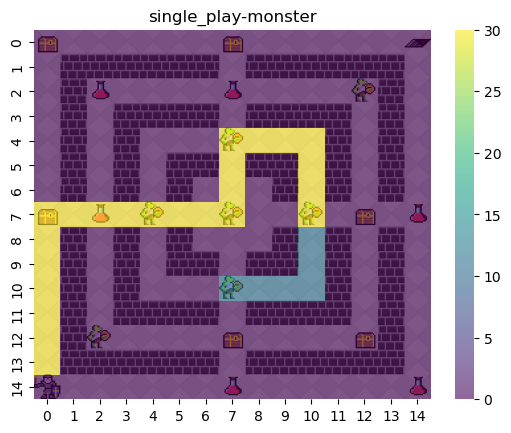

In [264]:

gen_heatmap(df=df.loc[df['experiment'] == 'single_play-monster'], f ='./README/resources/md_stages_screenshots/md-policy_0-v0_step0.png')

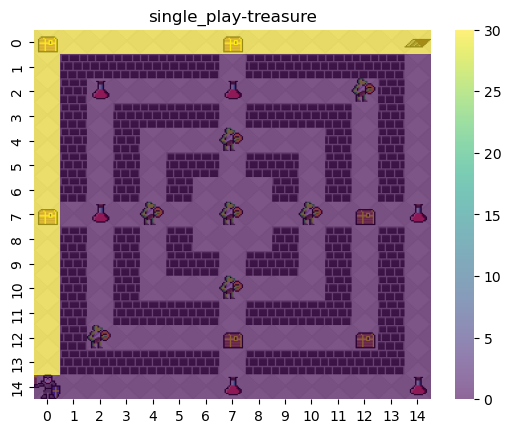

In [265]:
gen_heatmap(df=df.loc[df['experiment'] == 'single_play-treasure'], f ='./README/resources/md_stages_screenshots/md-policy_0-v0_step0.png')


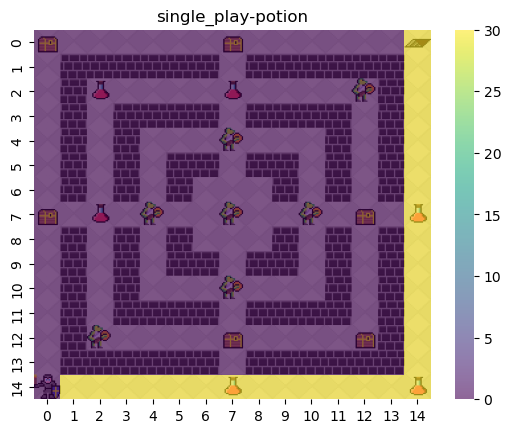

In [266]:
gen_heatmap(df=df.loc[df['experiment'] == 'single_play-potion'], f ='./README/resources/md_stages_screenshots/md-policy_0-v0_step0.png')

AttributeError: 'Axes' object has no attribute 'heat'

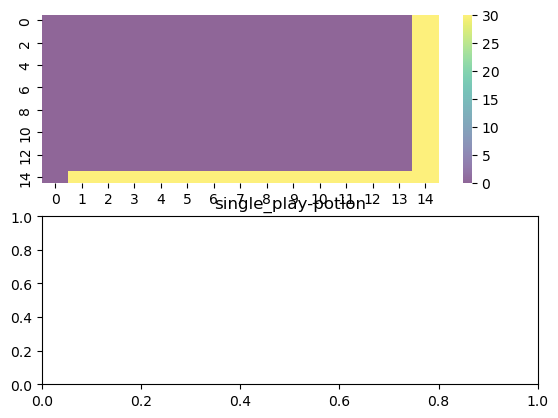

In [272]:
fig, (ax1, ax2) = plt.subplots(2)
gen_heatmap(df=df.loc[df['experiment'] == 'single_play-potion'], f ='./README/resources/md_stages_screenshots/md-policy_0-v0_step0.png',ax = ax1)
gen_heatmap(df=df.loc[df['experiment'] == 'single_play-treasure'], f ='./README/resources/md_stages_screenshots/md-policy_0-v0_step0.png',ax =ax2)
plt.show() 

In [1]:
from gym_md.helper.util import list_files
import gym

print(list_files("./shap/shap_gifs"))

['test.gif']


In [4]:
from gym_md.helper.policy_wrapper import PolicyWapper

policies = PolicyWapper(path='./play_style_models/base/')


TypeError: __init__() missing 1 required positional argument: 'setting'

In [5]:
from gym_md.helper.policy_wrapper import PolicyWapper

policies = PolicyWapper(path='./play_style_models/base/')

TypeError: __init__() missing 1 required positional argument: 'setting'